# Equation 4 Hamiltonian - ZXW Diagram and Eigenvalues

This notebook creates a ZXW diagram representing equation 4 from paper 2408:
**Ĥ^jk = F_jk σ̂_+^j σ̂_-^k + F_kj σ̂_-^j σ̂_+^k**

Which decomposes into Pauli strings as: **(F_jk/2) * (X_j X_k - Y_j Y_k)**

We then compute the eigenvalues of this Hamiltonian using the ZXW method.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import ishermitian
import sys
import os
import pyzx as zx
# Import ZXW functions
from pauli_hamiltonian_zx import PauliHamiltonianZX


from cor_decay_zxw import (
    compute_F_jk_equation5,
    create_equation4_hamiltonian,
    setup_positions_3d_grid,
    setup_positions_2d_grid
)


## Setup: Atom Positions and F_jk Matrix


In [30]:
# Parameters
N = 4 # Number of atoms (small for visualization)
lambda_val = 1.0  # Wavelength
gam = 1.0  # Decay rate Γ
m = 1.5  # Spacing multiplier

print(f"Setting up {N} atoms in 3D grid")
print(f"Wavelength: {lambda_val}, Decay rate: {gam}")

# Setup 3D grid positions
# x, y, z = setup_positions_3d_grid(N, m, lambda_val)
two_dim_positions = setup_positions_2d_grid(N, m, lambda_val)
print(two_dim_positions)
for i in range(len(two_dim_positions[0])):
    print(f"  Atom {i}: ({two_dim_positions[0][i]:.3f}, {two_dim_positions[1][i]:.3f})")

#for i in range(N):
#    print(f"  Atom {i}: ({x[i]:.3f}, {y[i]:.3f}, {z[i]:.3f})")


Setting up 4 atoms in 3D grid
Wavelength: 1.0, Decay rate: 1.0
(array([0.  , 0.  , 0.75, 0.75]), array([0.  , 0.75, 0.  , 0.75]), array([0., 0., 0., 0.]))
  Atom 0: (0.000, 0.000)
  Atom 1: (0.000, 0.750)
  Atom 2: (0.750, 0.000)
  Atom 3: (0.750, 0.750)


In [31]:
# Compute F_jk matrix using equation 5
F_matrix = compute_F_jk_equation5(*two_dim_positions, lambda_val, gam)

print(f"F_jk matrix shape: {F_matrix.shape}")
print(f"\nF_jk matrix (real part):")
print(F_matrix)

print(f"\nSample coupling values:")
for j in range(min(3, N)):
    for k in range(j+1, min(3, N)):
        print(f"  F_{j}{k} = {F_matrix[j, k].real:.6f} + {F_matrix[j, k].imag:.6f}i")


F_jk matrix shape: (4, 4)

F_jk matrix (real part):
[[0.+0.j         0.+0.15198794j 0.+0.15198794j 0.-0.05659477j]
 [0.+0.15198794j 0.+0.j         0.-0.05659477j 0.+0.15198794j]
 [0.+0.15198794j 0.-0.05659477j 0.+0.j         0.+0.15198794j]
 [0.-0.05659477j 0.+0.15198794j 0.+0.15198794j 0.+0.j        ]]

Sample coupling values:
  F_01 = 0.000000 + 0.151988i
  F_02 = 0.000000 + 0.151988i
  F_12 = 0.000000 + -0.056595i


In [32]:
# Create Pauli string Hamiltonian for equation 4
# This uses: (F_jk/2) * (X_j X_k - Y_j Y_k)
pauli_strings = create_equation4_hamiltonian(N, F_matrix)

print(f"Number of Pauli terms: {len(pauli_strings)}")
print(f"\nFirst 6 Pauli strings (showing X_j X_k and -Y_j Y_k pairs):")
for i, (coeff, gates) in enumerate(pauli_strings[:]):
    print(f"  {i+1}: {coeff:.6f} * {gates}")

# Create ZXW Hamiltonian
hamiltonian = PauliHamiltonianZX(pauli_strings)
print(f"\nTotal qubits: {hamiltonian.total_qubits}")


Number of Pauli terms: 13

First 6 Pauli strings (showing X_j X_k and -Y_j Y_k pairs):
  1: 0.000000+0.075994j * ['X0', 'X1']
  2: -0.000000-0.075994j * ['Y0', 'Y1']
  3: 0.000000+0.075994j * ['X0', 'X2']
  4: -0.000000-0.075994j * ['Y0', 'Y2']
  5: 0.000000-0.028297j * ['X0', 'X3']
  6: 0.000000+0.028297j * ['Y0', 'Y3']
  7: 0.000000-0.028297j * ['X1', 'X2']
  8: 0.000000+0.028297j * ['Y1', 'Y2']
  9: 0.000000+0.075994j * ['X1', 'X3']
  10: -0.000000-0.075994j * ['Y1', 'Y3']
  11: 0.000000+0.075994j * ['X2', 'X3']
  12: -0.000000-0.075994j * ['Y2', 'Y3']
  13: 0.000000-0.500000j * ['Z0', 'Z1', 'Z2', 'Z3']

Total qubits: 4


In [ ]:
# Build the ZXW diagram
print("Building ZXW diagram...")
graph = hamiltonian.build_graph()

print("Graph built successfully")

# Visualize the diagram
print("\nDisplaying ZXW diagram:")
#zx.draw(graph)
t_vals = np.linspace(0.0, 4, 10)

vals =  []
steps = 10
t_f = 10

gamma = 1

# factor = 10
# dt = 1/(N*gamma*factor)
# for i in range(int(t_f/dt)):
#     graph_new = hamiltonian.build_trotter_graph(steps=(i+1), time=i*dt)
#     gc = graph_new.copy()
#     gc.apply_state('1'*4)
#     zx.hsimplify.from_hypergraph_form(gc)
#     g_conj = gc.adjoint()
#     combined = gc.compose(g_conj)
#     vals.append(gc.to_matrix()[0]*(np.exp(-N*steps/4)))

for t in t_vals:
    graph_new = hamiltonian.build_trotter_graph(steps=steps, time=t)
    gc = graph_new.copy()
    gc.apply_state('1'*(N-1)+'0')
    zx.hsimplify.from_hypergraph_form(gc)
    g_conj = gc.adjoint()
    combined = gc.compose(g_conj)
    vals.append(gc.to_matrix()[0]*(np.exp(-N*gamma*t*steps/2)))



Building ZXW diagram...
Graph built successfully

Displaying ZXW diagram:


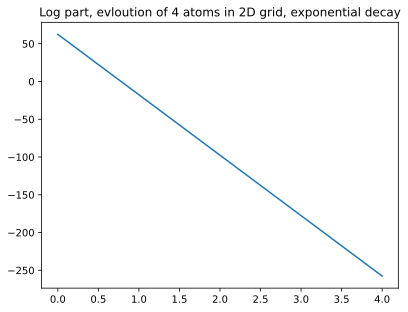

In [52]:

plt.plot(t_vals,np.log(np.real(vals)))
plt.title("Log part, evloution of 4 atoms in 2D grid, exponential decay")
plt.show()


In [ ]:
gc = graph_new.copy()
gc.apply_state('1'*4)
zx.hsimplify.from_hypergraph_form(gc)
#zx.draw(gc)
g_conj = gc.adjoint()
#zx.draw(g_conj)
combined = gc.compose(g_conj)

# zx.full_reduce(gc)
#zx.draw(gc)
t=4
np.is_graph_new.to_matrix()*(np.exp(-N*gamma*t/2))


[[ 2.57418708e+10-0.00053885j -8.06506857e-03+0.0122135j
  -7.47204882e-03+0.01245341j  2.20884616e+10-0.00045804j
  -6.40461327e-03+0.01070329j  2.14330552e-05-0.00000096j
   7.83590162e+09-0.00015842j -3.79532638e-03+0.00616199j
  -6.76042512e-03+0.01055575j  7.83590162e+09-0.0001612j
   1.64018167e-05+0.00000046j -4.29939317e-03+0.00613775j
   2.20884616e+10-0.00045526j -4.50695008e-03+0.00655466j
  -5.21857378e-03+0.00699763j  1.39388289e+10-0.00029265j]
 [-1.61493109e-02+0.02030923j  1.21061805e+13-0.24944068j
   1.08935769e-02-0.00022232j -1.69274235e-02+0.02004447j
   7.03282534e+12-0.14183882j -1.58948611e-02+0.02276848j
  -8.31607877e-03+0.01035939j  2.18529175e+12-0.04401894j
   1.13382127e-02-0.00111159j -9.76635566e-03+0.02152652j
  -1.73763002e-17+0.j          2.94571211e-03-0.00005558j
  -1.58922558e-02+0.02064369j  6.94800682e+12-0.14428431j
   6.89185475e-03-0.j         -5.46068330e-03+0.01066374j]
 [-1.46243490e-02+0.0193272j   5.78026527e-03-0.j
   1.21731675e+13-0.24

In [ ]:
ss = zx.id(4)
s=ss.to_graph()
s.apply_state('1'*4)

zx.draw(s)
s.to_matrix()

array([[0.+0.j]])

In [ ]:
# Simplify the diagram
print("Simplifying ZXW diagram...")
hamiltonian._normalize_rows(graph_new)
print("Graph simplified")

# Visualize simplified diagram
print("\nDisplaying simplified ZXW diagram:")
zx.draw(graph_new)


Simplifying ZXW diagram...
Graph simplified

Displaying simplified ZXW diagram:


In [ ]:
qtn = hamiltonian.to_tensor_network()
outer_inds = qtn.outer_inds()
inner_inds = [ind for ind in qtn.ind_map.keys() if ind not in outer_inds]
    
print(f"  Outer indices (inputs/outputs): {len(outer_inds)}")
print(f"  Inner indices (to contract): {len(inner_inds)}")
    

  Outer indices (inputs/outputs): 8
  Inner indices (to contract): 105


In [ ]:
def normalize_graph_rows(graph):
    rows = sorted(set(graph.row(v) for v in graph.vertices()))
    row_mapping = {old_row: new_row for new_row, old_row in enumerate(rows)}
    for v in graph.vertices():
        old_row = graph.row(v)
        new_row = row_mapping[old_row]
        
        if hasattr(graph, '_row') and isinstance(graph._row, dict):
            graph._row[v] = new_row
        
        elif hasattr(graph, 'set_row'):
            graph.set_row(v, new_row)
        else:
            
            try:
                vdata = graph.vertex_data(v)
                if vdata is not None and hasattr(vdata, 'row'):
                    vdata.row = new_row
            except:
                pass
    
    return graph

